In [1]:
import pandas as pd

In [2]:
shopping_data = pd.read_csv("shopping_trends.csv")

Shape of a dataset

In [5]:
shopping_data.shape

(3900, 19)

# get a sense of its structure.

In [3]:
shopping_data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


# get summary statistics for numerical columns.

In [25]:
shopping_data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


# Identify unique values in categorical columns. This can be helpful for understanding the diversity in your dataset.

In [29]:
for column in shopping_data.select_dtypes(include = 'object').columns:
    print(f"{column}: {shopping_data[column].nunique()} unique values")

Gender: 2 unique values
Item Purchased: 25 unique values
Category: 4 unique values
Location: 50 unique values
Size: 4 unique values
Color: 25 unique values
Season: 4 unique values
Subscription Status: 2 unique values
Payment Method: 6 unique values
Shipping Type: 6 unique values
Discount Applied: 2 unique values
Promo Code Used: 2 unique values
Preferred Payment Method: 6 unique values
Frequency of Purchases: 7 unique values


# Check for missing values in the dataset.


In [32]:
shopping_data.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

# Correlation Analysis:

In [37]:
corr_shopping_data = shopping_data.describe()
corr_shopping_data.corr()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
Customer ID,1.000000,0.531016,0.536642,0.520721,0.529545
Age,0.531016,1.000000,0.999978,0.999919,0.999989
Purchase Amount (USD),0.536642,0.999978,1.000000,0.999815,0.999954
Review Rating,0.520721,0.999919,0.999815,1.000000,0.999946
Previous Purchases,0.529545,0.999989,0.999954,0.999946,1.000000


# Create Distribution Plots to visualize the distribution of numerical variables.

import modules

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

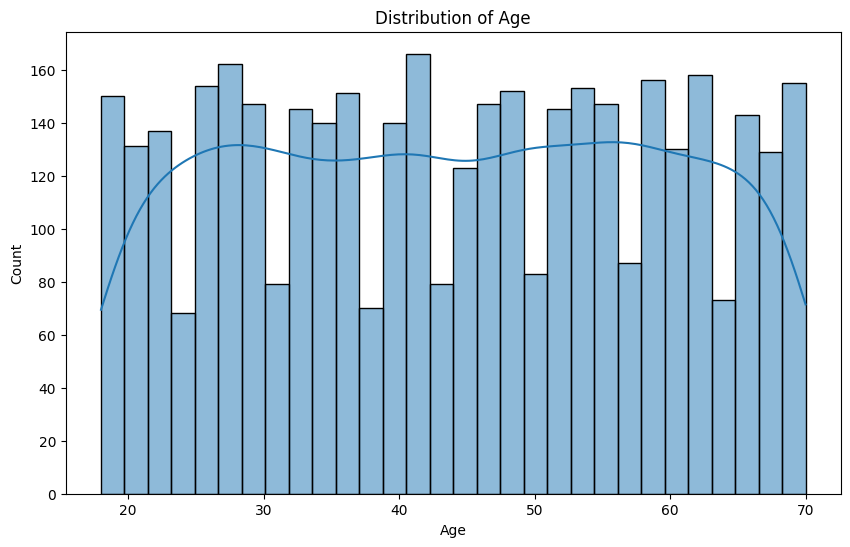

In [44]:
plt.figure(figsize = (10, 6))
sns.histplot(shopping_data['Age'], bins = 30, kde = True)
plt.title('Distribution of Age')
plt.show()

# Explore the distribution of categorical variables using bar plots.

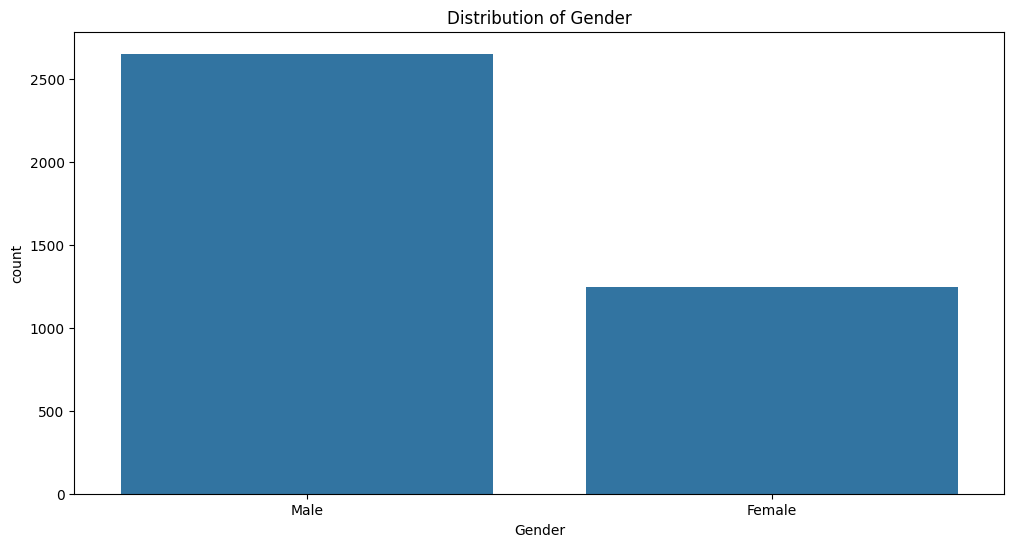

In [45]:
plt.figure(figsize=(12, 6))
sns.countplot(x = 'Gender', data = shopping_data)
plt.title('Distribution of Gender')
plt.show()

# Identify Outliers on "Review Rating"

Create box plots for numerical variables to visually identify potential outliers.

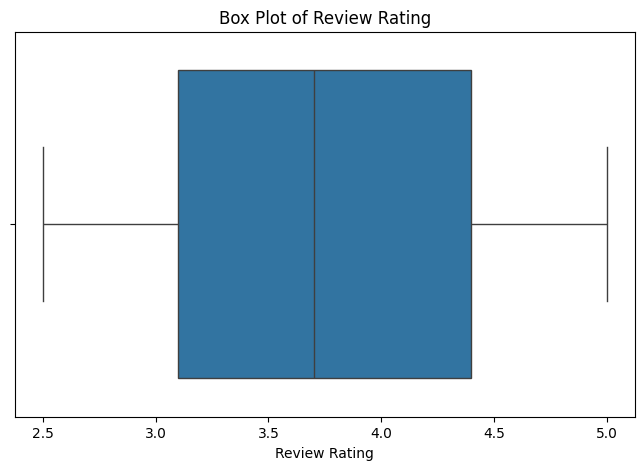

In [46]:
plt.figure(figsize=(8, 5))
sns.boxplot(x = shopping_data['Review Rating'])
plt.title('Box Plot of Review Rating')
plt.show()

Calculate the Z-score for numerical columns and if there's any then remove them.

import module


In [47]:
from scipy.stats import zscore

In [51]:
z_score = zscore(shopping_data['Review Rating'])

outliers = (z_score > 3) | (z_score < -3)

if outliers.all():
    shopping_data[~outliers]
else:
    print(f"Number of outliers: {outliers.sum()}")

Number of outliers: 0


# Apply transformations to make the data more normal

In [52]:
import numpy as np

In [54]:
shopping_data['Review Rating'] = np.log1p(shopping_data['Review Rating'])

# Create new features that might be more informative for my analysis.

Total Spending:

In [57]:
shopping_data['Total Spending Amount (USD)'] = shopping_data['Purchase Amount (USD)'] * shopping_data['Previous Purchases']

Dropping a colums

In [63]:
shopping_data.drop('Total Spending', axis=1, inplace=True)
shopping_data

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Total Spending Amount (USD),Age Group
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly,742,51+
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly,128,19-30
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly,1679,31-50
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly,4410,19-30
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually,1519,31-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,...,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly,896,31-50
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,...,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,2009,51+
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,...,No,Credit Card,Standard,No,No,24,Venmo,Quarterly,792,31-50
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,...,No,PayPal,Express,No,No,24,Venmo,Weekly,1848,31-50


create categorical age groups.

In [69]:
bins = [0, 18, 30, 50, 100]
labels = ['0-18', '19-30', '31-50', '51+']

shopping_data.drop('Age', axis=1, inplace=True)
shopping_data

,Customer ID,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Total Spending Amount (USD),Age Group
0,1,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,1.410987,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly,742,51+
1,2,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,1.410987,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly,128,19-30
2,3,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,1.410987,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly,1679,31-50
3,4,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,1.504077,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly,4410,19-30
4,5,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,1.308333,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually,1519,31-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,1.648659,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly,896,31-50
3896,3897,Female,Backpack,Accessories,49,Iowa,L,White,Spring,1.704748,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,2009,51+
3897,3898,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,1.360977,No,Credit Card,Standard,No,No,24,Venmo,Quarterly,792,31-50
3898,3899,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,1.568616,No,PayPal,Express,No,No,24,Venmo,Weekly,1848,31-50


Calculate the average price per item purchased by each customer.

In [71]:
shopping_data['Avg Price per Item'] = shopping_data['Total Spending Amount (USD)'] / shopping_data['Previous Purchases']
shopping_data

,Customer ID,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,...,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Total Spending Amount (USD),Age Group,Avg Price per Item
0,1,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,1.410987,...,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly,742,51+,53.0
1,2,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,1.410987,...,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly,128,19-30,64.0
2,3,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,1.410987,...,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly,1679,31-50,73.0
3,4,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,1.504077,...,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly,4410,19-30,90.0
4,5,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,1.308333,...,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually,1519,31-50,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,1.648659,...,Cash,2-Day Shipping,No,No,32,Venmo,Weekly,896,31-50,28.0
3896,3897,Female,Backpack,Accessories,49,Iowa,L,White,Spring,1.704748,...,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,2009,51+,49.0
3897,3898,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,1.360977,...,Credit Card,Standard,No,No,24,Venmo,Quarterly,792,31-50,33.0
3898,3899,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,1.568616,...,PayPal,Express,No,No,24,Venmo,Weekly,1848,31-50,77.0


Combine 'Age Group' and 'Gender' to create a new feature capturing both aspects.

In [76]:
shopping_data['Age Group'].dtype

CategoricalDtype(categories=['0-18', '19-30', '31-50', '51+'], ordered=True, categories_dtype=object)

In [79]:
shopping_data['Age_Gender'] = f"{shopping_data['Age Group']} - {shopping_data['Gender']}"
shopping_data

,Customer ID,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,...,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Total Spending Amount (USD),Age Group,Avg Price per Item,Age_Gender
0,1,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,1.410987,...,Express,Yes,Yes,14,Venmo,Fortnightly,742,51+,53.0,0 51+\n1 19-30\n2 31-50\n3...
1,2,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,1.410987,...,Express,Yes,Yes,2,Cash,Fortnightly,128,19-30,64.0,0 51+\n1 19-30\n2 31-50\n3...
2,3,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,1.410987,...,Free Shipping,Yes,Yes,23,Credit Card,Weekly,1679,31-50,73.0,0 51+\n1 19-30\n2 31-50\n3...
3,4,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,1.504077,...,Next Day Air,Yes,Yes,49,PayPal,Weekly,4410,19-30,90.0,0 51+\n1 19-30\n2 31-50\n3...
4,5,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,1.308333,...,Free Shipping,Yes,Yes,31,PayPal,Annually,1519,31-50,49.0,0 51+\n1 19-30\n2 31-50\n3...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,1.648659,...,2-Day Shipping,No,No,32,Venmo,Weekly,896,31-50,28.0,0 51+\n1 19-30\n2 31-50\n3...
3896,3897,Female,Backpack,Accessories,49,Iowa,L,White,Spring,1.704748,...,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,2009,51+,49.0,0 51+\n1 19-30\n2 31-50\n3...
3897,3898,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,1.360977,...,Standard,No,No,24,Venmo,Quarterly,792,31-50,33.0,0 51+\n1 19-30\n2 31-50\n3...
3898,3899,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,1.568616,...,Express,No,No,24,Venmo,Weekly,1848,31-50,77.0,0 51+\n1 19-30\n2 31-50\n3...


# Look for patterns or trends in your data.


Explore patterns based on customer segments. You can use demographic information (e.g., age, gender).

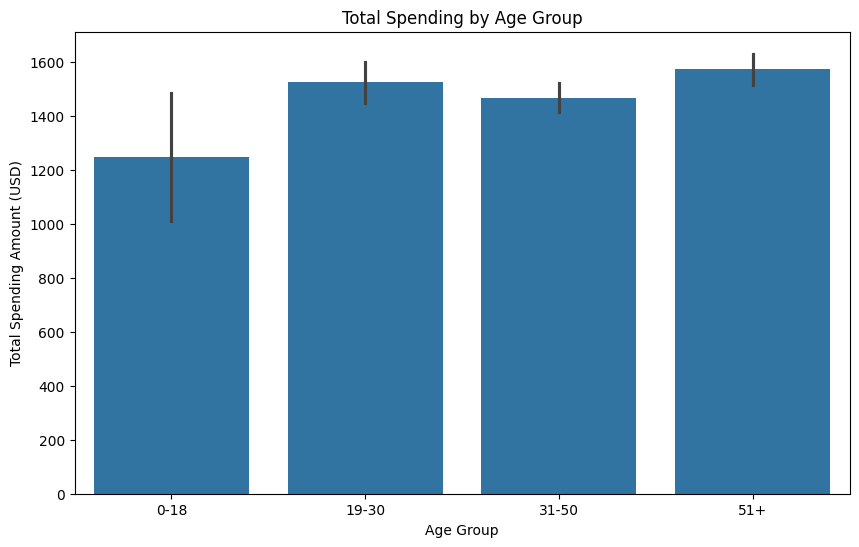

In [80]:
plt.figure(figsize=(10, 6))
sns.barplot(x = 'Age Group', y = 'Total Spending Amount (USD)', data = shopping_data)
plt.title('Total Spending by Age Group')
plt.show()

Product Trends:
Analyze trends related to specific products or categories

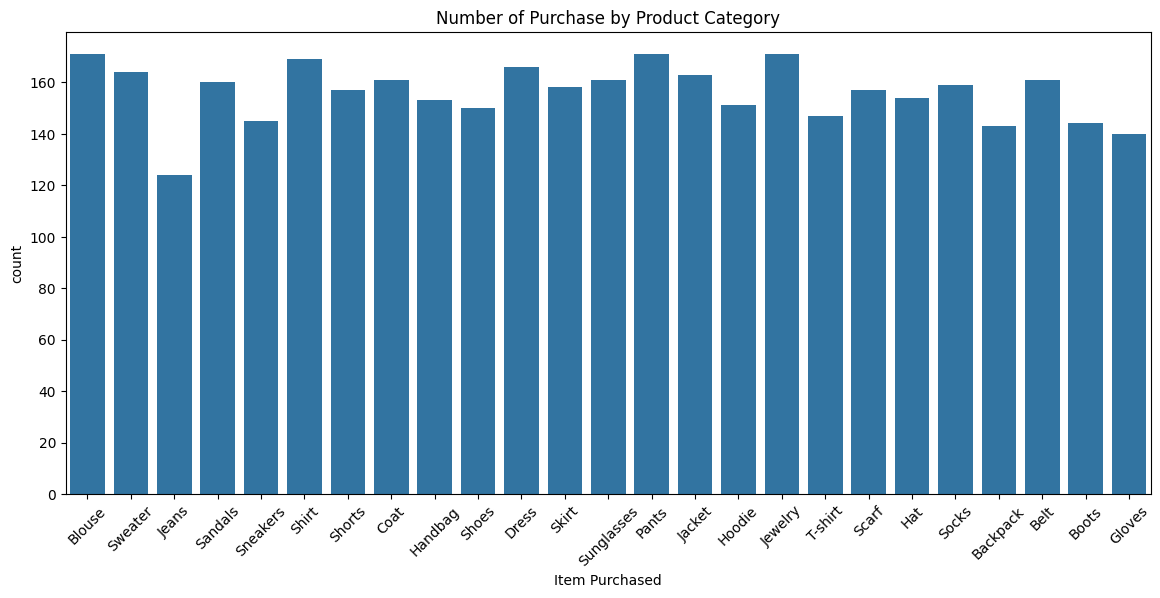

In [85]:
plt.figure(figsize=(14, 6))
sns.countplot(x = 'Item Purchased', data = shopping_data)
plt.title('Number of Purchase by Product Category')
plt.xticks(rotation=45)
plt.show()

Investigate whether there are seasonal patterns in your data.

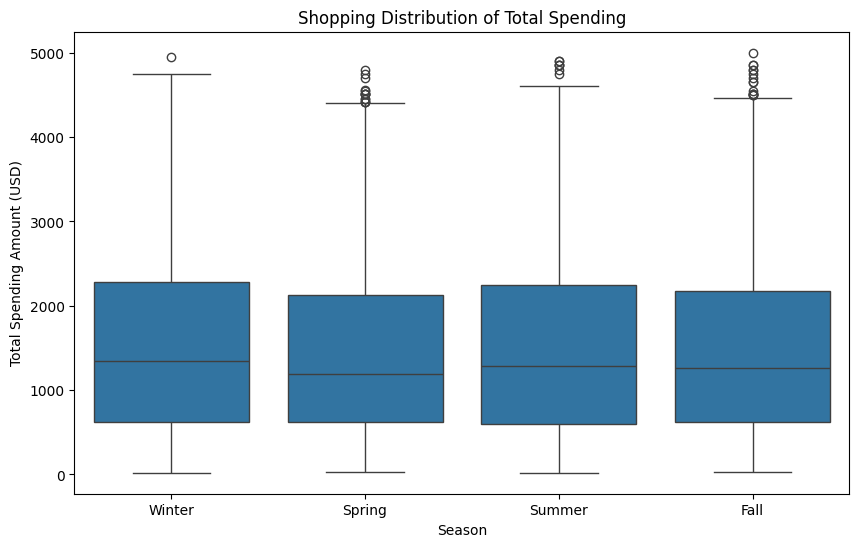

In [95]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'Season', y = 'Total Spending Amount (USD)', data = shopping_data)
plt.title('Shopping Distribution of Total Spending')
plt.show()

Correlation Analysis:
Explore relationships between different variables.

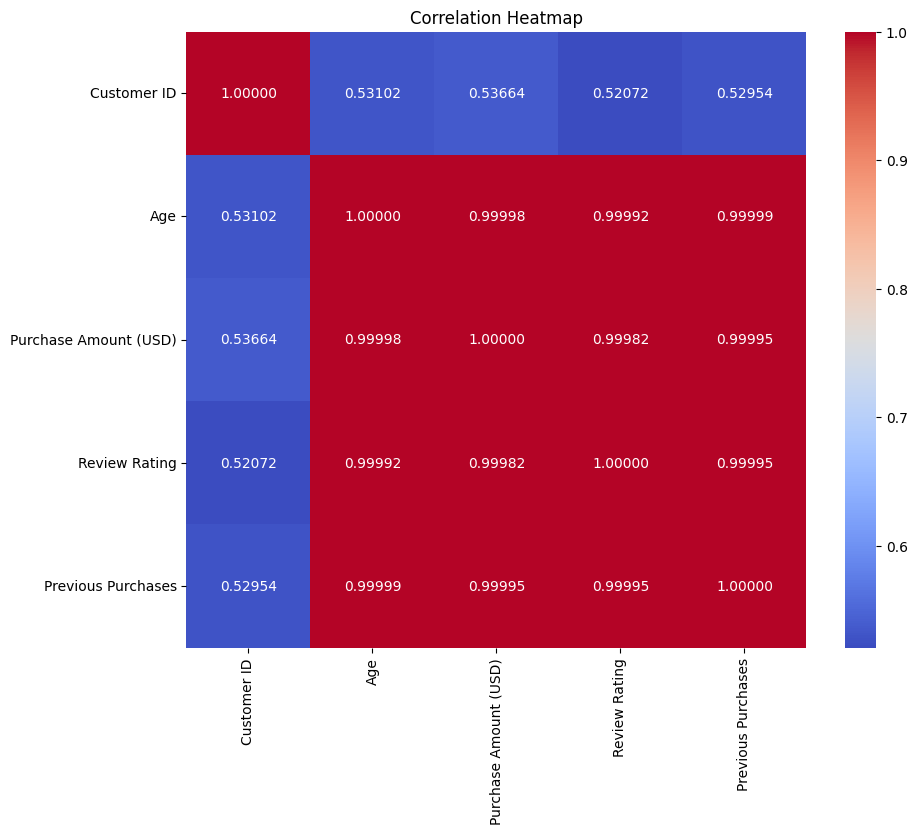

In [100]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_shopping_data.corr(), annot=True, cmap='coolwarm', fmt='.5f')
plt.title('Correlation Heatmap')
plt.show()

# Data Transformation:

Perform data transformations as needed.

Normalization/Scaling:
Standardize numerical features to have a mean of 0 and a standard deviation of 1.

In [101]:
from sklearn.preprocessing import StandardScaler

In [103]:
scaler = StandardScaler()
shopping_data[['Total Spending Amount (USD)', 'Avg Price per Item']] = scaler.fit_transform(shopping_data[['Total Spending Amount (USD)', 'Avg Price per Item']])
shopping_data

,Customer ID,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,...,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Total Spending Amount (USD),Age Group,Avg Price per Item,Age_Gender
0,1,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,1.410987,...,Express,Yes,Yes,14,Venmo,Fortnightly,-0.694732,51+,-0.285629,0 51+\n1 19-30\n2 31-50\n3...
1,2,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,1.410987,...,Express,Yes,Yes,2,Cash,Fortnightly,-1.244517,19-30,0.178852,0 51+\n1 19-30\n2 31-50\n3...
2,3,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,1.410987,...,Free Shipping,Yes,Yes,23,Credit Card,Weekly,0.144272,31-50,0.558882,0 51+\n1 19-30\n2 31-50\n3...
3,4,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,1.504077,...,Next Day Air,Yes,Yes,49,PayPal,Weekly,2.589652,19-30,1.276716,0 51+\n1 19-30\n2 31-50\n3...
4,5,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,1.308333,...,Free Shipping,Yes,Yes,31,PayPal,Annually,0.001006,31-50,-0.454531,0 51+\n1 19-30\n2 31-50\n3...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,1.648659,...,2-Day Shipping,No,No,32,Venmo,Weekly,-0.556838,31-50,-1.341267,0 51+\n1 19-30\n2 31-50\n3...
3896,3897,Female,Backpack,Accessories,49,Iowa,L,White,Spring,1.704748,...,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,0.439759,51+,-0.454531,0 51+\n1 19-30\n2 31-50\n3...
3897,3898,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,1.360977,...,Standard,No,No,24,Venmo,Quarterly,-0.649962,31-50,-1.130139,0 51+\n1 19-30\n2 31-50\n3...
3898,3899,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,1.568616,...,Express,No,No,24,Venmo,Weekly,0.295597,31-50,0.727784,0 51+\n1 19-30\n2 31-50\n3...
